In [160]:
#Generate dataset
import cv2
import csv
import glob
  
header  =["label"]
for i in range(0,784):
   header.append("pixel"+str(i))
with open('dataset.csv', 'a') as f:
   writer = csv.writer(f)
   writer.writerow(header)
    
for label in range(10):
   dirList = glob.glob("captured_images/"+str(label)+"/*.png")
    
   for img_path in dirList:
       im= cv2.imread(img_path)
       im_gray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
       im_gray = cv2.GaussianBlur(im_gray,(15,15), 0)
       roi= cv2.resize(im_gray,(28,28), interpolation=cv2.INTER_AREA)
        
       data=[]
       data.append(label)
       rows, cols = roi.shape
        
       ## Fill the data array with pixels one by one.
       for i in range(rows):
           for j in range(cols):
               k =roi[i,j]
               if k<255:
                   k=1
               else:
                   k=0
               data.append(k)
       with open('dataset.csv', 'a') as f:
           writer = csv.writer(f)
           writer.writerow(data)

In [161]:
import pandas as pd #pip install pandas
from sklearn.utils import shuffle #pip install scikit-learn
#0,....,1.....,2.....
#5,3,1,0,2,5,.......
 
data = pd.read_csv('dataset.csv')
data = shuffle(data)
print(data)

     label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
79       1       0       0       0       0       0       0       0       0   
188      4       0       0       0       0       0       0       0       0   
106      1       0       0       0       0       0       0       0       0   
127      2       0       0       0       0       0       0       0       0   
84       1       0       0       0       0       0       0       0       0   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
331      9       0       0       0       0       0       0       0       0   
195      4       0       0       0       0       0       0       0       0   
134      2       0       0       0       0       0       0       0       0   
74       1       0       0       0       0       0       0       0       0   
264      7       0       0       0       0       0       0       0       0   

     pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel

In [162]:
X = data.drop(["label"],axis=1)
Y= data["label"]

9


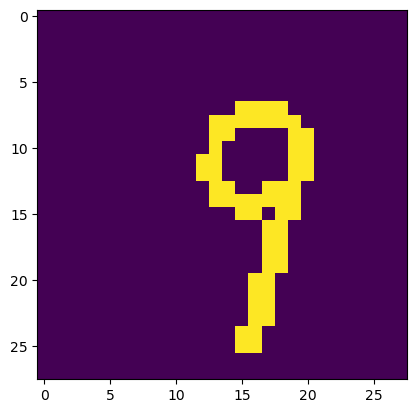

In [163]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
idx = 349
img = X.loc[idx].values.reshape(28,28)
print(Y[idx])
plt.imshow(img)

In [164]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.2, random_state=42)


In [165]:
import joblib
from sklearn.svm import SVC
classifier = SVC(kernel="linear",  C=1.0)
classifier.fit(train_x,train_y)
joblib.dump(classifier,"model/digit_recognizer")

['model/digit_recognizer']

In [166]:
classifier.score(test_x,test_y)

0.8714285714285714

In [167]:
from sklearn import metrics
prediction = classifier.predict(test_x)
print("Accuracy= ", metrics.accuracy_score(prediction, test_y))

Accuracy=  0.8714285714285714


In [168]:
y_pred = classifier.predict(test_x)

In [169]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(test_y, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.8428571428571427


In [170]:
# Load the model

In [175]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

# Load the trained model
model = joblib.load("model/digit_recognizer")

image_folder = "img/"

while True:
    img = "test.png"
    
    im = cv2.imread(img)
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape
    

    X = []

    # Fill the data array with pixels one by one.
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    # Make prediction using the loaded model
    predictions = model.predict([X])
    print("Prediction:", predictions[0])

    
    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    # Adjust the delay based on your requirements
    cv2.waitKey(1000)

    # Break the loop if 'Enter' key is pressed
    if cv2.waitKey(1) == 13:
        break

cv2.destroyAllWindows()


Prediction: 0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1350: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvStartWindowThread'
